<a href="https://colab.research.google.com/github/liviasousas/projetoUnicornio_dados/blob/main/projeto_unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Ler os dados
Base_Dados = pd.read_csv('/content/unicorns till sep 2022.csv')

# Verificar
Base_Dados.shape

(1186, 7)

In [ ]:
# Primeiro registros
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# columnas
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
# Renomear
Base_Dados.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )

In [ ]:
# Verificar Tipo do informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
# Campos nulos
Base_Dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investors         18
dtype: int64

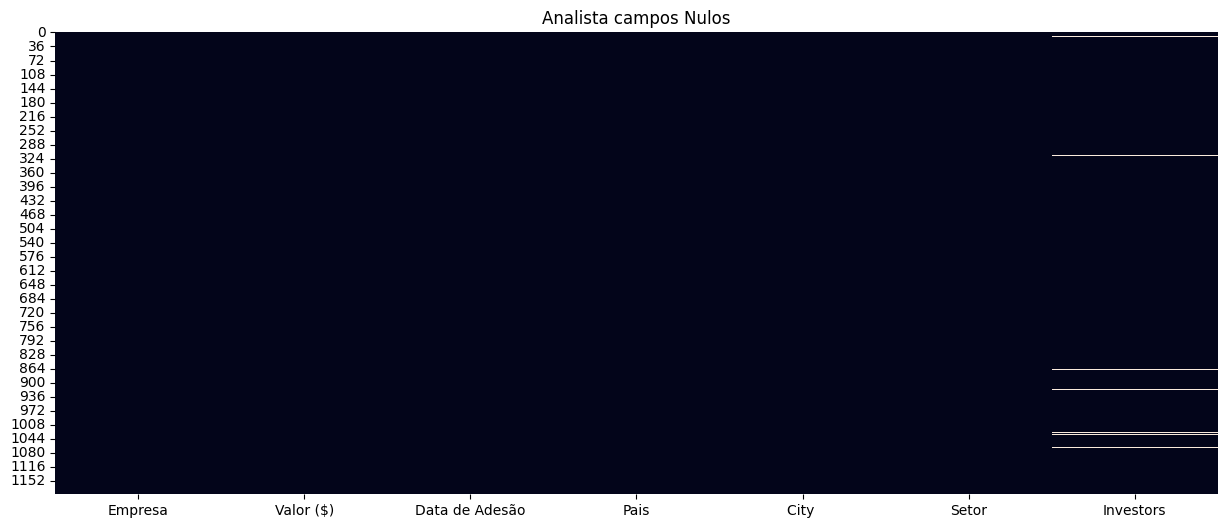

In [ ]:
# Grafica
plt.figure(figsize=(15,6))
plt.title('Analista campos Nulos')
sns.heatmap(Base_Dados.isnull(), cbar=False );

In [ ]:
# Campos unicos
Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investors         1152
dtype: int64

In [ ]:
# Valores unicos - Ranl
Base_Dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [ ]:
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

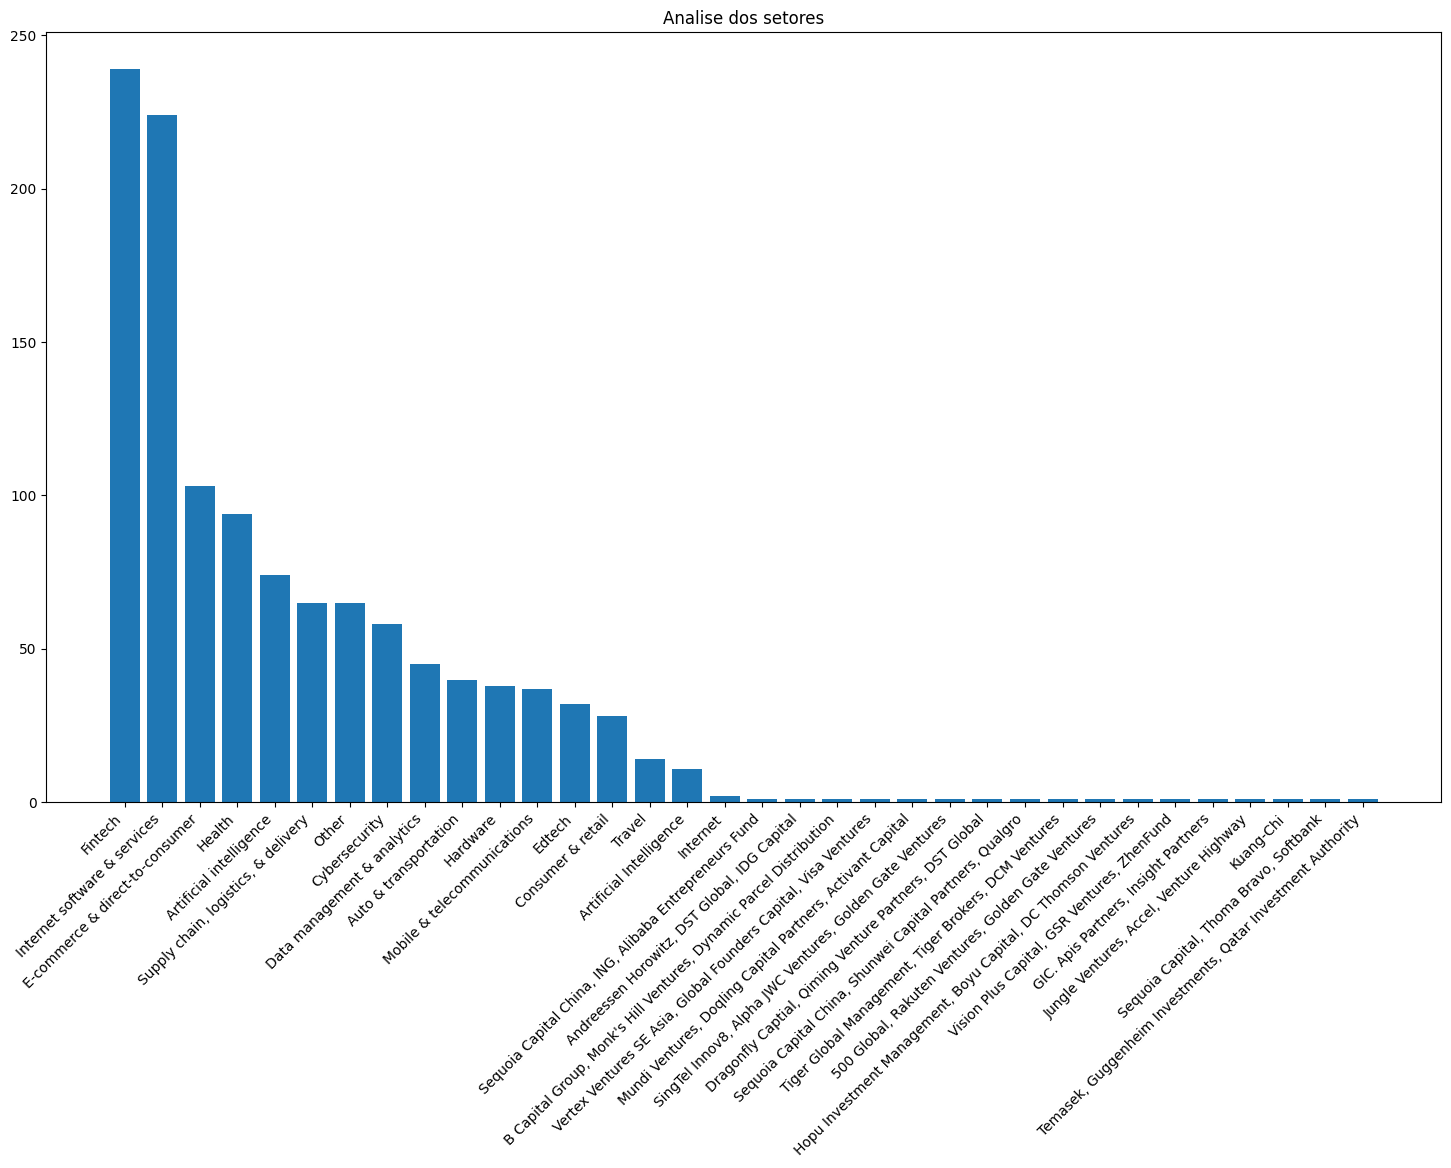

In [ ]:

plt.figure(figsize=(18,10))
plt.title('Analise dos setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks(rotation=45, ha='right');



In [ ]:
Analise = round(Base_Dados['Pais'].value_counts(normalize=True) * 100, 1)

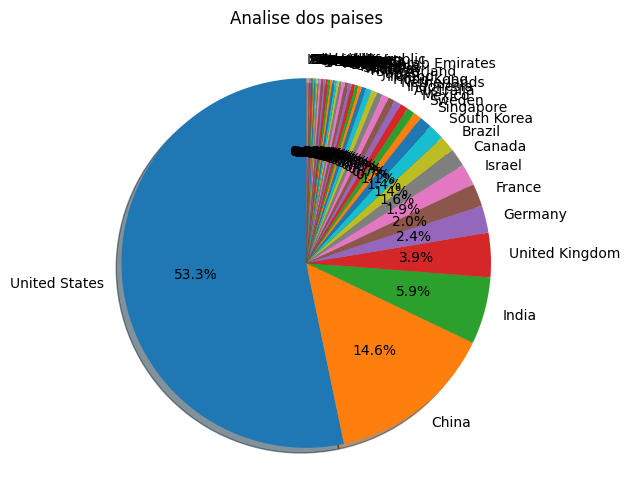

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Analise dos paises')
plt.pie(
   Analise,
   labels = Analise .index,
   shadow=True,
   startangle=90,
   autopct='%1.1f%%'
);

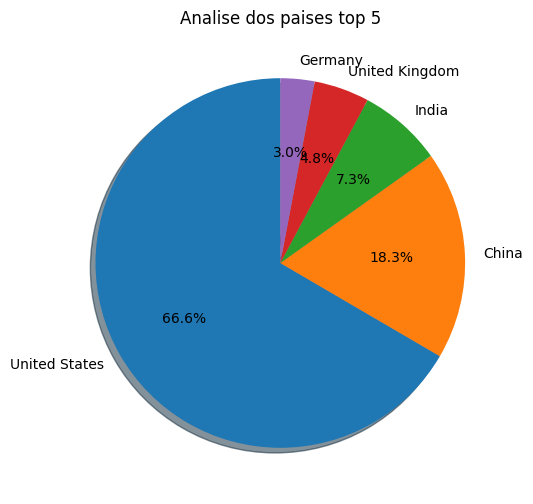

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Analise dos paises top 5')
plt.pie(
   Analise.head(5),
   labels = Analise .index[0:5],
   shadow=True,
   startangle=90,
   autopct='%1.1f%%'
);

In [ ]:
# Conversão para Data

Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados ['Data de Adesão'])
Base_Dados['Data de Adesão'].head()


NameError: ignored

In [ ]:
# Extrair o Ano e Mes
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year

Base_Dados.head()

NameError: ignored

In [ ]:
# Tabela Analitica
Analise_Agrupar = Base_Dados.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count().reset_index();

Analise_Agrupar

,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investors
0,Argentina,2021,8,Uala,1,1,1,1,1
1,Australia,2018,1,Canva,1,1,1,1,1
2,Australia,2019,3,Airwallex,1,1,1,1,1
3,Australia,2021,5,SafetyCulture,1,1,1,1,1
4,Australia,2021,7,Culture Amp,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1,1,1,1,1
1182,United States,2022,8,Incredible Health,1,1,1,1,1
1183,United States,2022,8,Orna Therapeutics,1,1,1,1,1
1184,Vietnam,2021,10,Sky Mavis,1,1,1,1,1


In [ ]:
Analise_Agrupar.loc[
    Analise_Agrupar['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investors
16,Brazil,2018,7,Movile,1,1,1,1,1
17,Brazil,2018,11,iFood,1,1,1,1,1
18,Brazil,2019,6,Loggi,1,1,1,1,1
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
20,Brazil,2019,10,EBANX,1,1,1,1,1
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
22,Brazil,2020,1,Loft,1,1,1,1,1
23,Brazil,2020,12,C6 Bank,1,1,1,1,1
24,Brazil,2020,12,Creditas,1,1,1,1,1
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1
